In [1]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def jerk_model( time_step, a0, a1, a2):
    
    return a0 * ( ( time_step - a1)**2 ) * ( (time_step - a2)**2 )

In [3]:
emp_data = None
date = '09112020-1104'
emp_data = pd.read_excel('../Assets/Resources/DataSimulation/Speeds/' + date + '.xlsx')

In [4]:
emp_data.head()

Time  BoneID                        Name  RightPos  RightSpeed  \
0  14.26655       0  Hand_Start_CapsuleCollider  0.689864    0.680062   
1  14.29875       0  Hand_Start_CapsuleCollider  0.690432    0.043761   
2  14.32684       0  Hand_Start_CapsuleCollider  0.690987    0.084566   
3  14.35850       0  Hand_Start_CapsuleCollider  0.691467    0.073152   
4  14.38657       0  Hand_Start_CapsuleCollider  0.691950    0.140859   

   RightPosX  RightPosY  RightPosZ  RightVelX  RightVelY  ...  BoneID.18  \
0    -0.0479    -0.6872    -0.0372    -0.4922     0.1155  ...         18   
1    -0.0486    -0.6878    -0.0365    -0.0191     0.0158  ...         18   
2    -0.0494    -0.6883    -0.0357    -0.0836     0.0007  ...         18   
3    -0.0503    -0.6887    -0.0352     0.0718    -0.0125  ...         18   
4    -0.0512    -0.6892    -0.0347    -0.0431     0.1132  ...         18   

                       Name.18 RightPos.18  RightSpeed.18  RightPosX.18  \
0  Hand_Pinky3_CapsuleCollider    0.694181       3.414202       -0.0084   
1  Hand_Pinky3_CapsuleCollider    0.695419       3.265268       -0.0093   
2  Hand_Pinky3_CapsuleCollider    0.696608       3.411879       -0.0100   
3  Hand_Pinky3_CapsuleCollider    0.697608       3.266247       -0.0107   
4  Hand_Pinky3_CapsuleCollider    0.698600       3.410997       -0.0114   

   RightPosY.18  RightPosZ.18  RightVelX.18  RightVelY.18  RightVelZ.18  
0       -0.6901        0.0747        2.4549        0.3431        2.3479  
1       -0.6912        0.0755        2.4634        0.3070        2.1212  
2       -0.6924        0.0762        2.4527        0.3492        2.3459  
3       -0.6933        0.0766        2.4644        0.3140        2.1205  
4       -0.6942        0.0771        2.4519        0.3446        2.3461  

[5 rows x 191 columns]

In [5]:
emp_data.columns[13]

'RightPos.1'

In [6]:
len(emp_data['Time'])

3868

In [7]:
positions = None
positions = pd.DataFrame()
positions['Time'] = emp_data['Time']
positions['Phalanx_0'] = emp_data['RightPos']

for i in range(1,19):
    positions['Phalanx_' + str(i) ] = emp_data['RightPos.' + str(i)]

In [8]:
positions.head()

Time  Phalanx_0  Phalanx_1  Phalanx_2  Phalanx_3  Phalanx_4  Phalanx_5  \
0  14.26655   0.689864   0.684408   0.685508   0.685165   0.688831   0.690132   
1  14.29875   0.690432   0.684974   0.686101   0.685751   0.689429   0.690885   
2  14.32684   0.690987   0.685525   0.686679   0.686322   0.690013   0.691615   
3  14.35850   0.691467   0.685998   0.687165   0.686800   0.690526   0.692268   
4  14.38657   0.691950   0.686474   0.687654   0.687281   0.691041   0.692921   

   Phalanx_6  Phalanx_7  Phalanx_8  Phalanx_9  Phalanx_10  Phalanx_11  \
0   0.699191   0.690910   0.690156   0.691753    0.686092    0.688300   
1   0.700149   0.691935   0.691430   0.693182    0.687127    0.689616   
2   0.701074   0.692923   0.692653   0.694554    0.688124    0.690880   
3   0.701902   0.693786   0.693719   0.695748    0.688983    0.691971   
4   0.702725   0.694644   0.694776   0.696931    0.689837    0.693051   

   Phalanx_12  Phalanx_13  Phalanx_14  Phalanx_15  Phalanx_16  Phalanx_17  \
0    0.693039    0.689469    0.689487    0.692353    0.695958    0.692272   
1    0.694530    0.690459    0.690733    0.693771    0.696874    0.693383   
2    0.695959    0.691413    0.691930    0.695130    0.697758    0.694451   
3    0.697192    0.692224    0.692953    0.696293    0.698499    0.695349   
4    0.698412    0.693032    0.693967    0.697444    0.699237    0.696242   

   Phalanx_18  
0    0.694181  
1    0.695419  
2    0.696608  
3    0.697608  
4    0.698600

In [9]:
(positions['Phalanx_' + str(0)][30] - positions['Phalanx_0'][0])/(positions['Time'][30] - positions['Time'][0])
#positions['Phalanx_0'][0] = 666

0.0030012610340478902

In [12]:
speeds = None
filter_choice = 30
speeds = pd.DataFrame()
speeds['Time'] = positions['Time'][0:len(emp_data['Time']) - filter_choice]
for i in range(0, 19):
    for j in range(0, len(emp_data['Time']) - filter_choice):
        speeds['Phalanx_' + str(i)] =  (positions['Phalanx_' + str(i)][j+filter_choice] - positions['Phalanx_' + str(i) ][j])/(positions['Time'][j+filter_choice] - positions['Time'][j])


In [13]:
for i in range(0, 19):
    for j in range(0, len(emp_data['Time']) - filter_choice):
        speeds['Phalanx_' + str(i)].loc[j] = (positions['Phalanx_' + str(i)][j+filter_choice] - positions['Phalanx_' + str(i) ][j])/(positions['Time'][j+filter_choice] - positions['Time'][j])

In [14]:
#speeds['Time'] = positions['Time']
speeds.describe()

Time    Phalanx_0    Phalanx_1    Phalanx_2    Phalanx_3  \
count  3838.000000  3838.000000  3838.000000  3838.000000  3838.000000   
mean     68.880762    -0.000466    -0.000466    -0.000481    -0.000480   
std      30.662476     0.071790     0.071558     0.071834     0.071567   
min      14.266550    -0.211849    -0.212020    -0.213873    -0.213479   
25%      42.417430    -0.051663    -0.051479    -0.051556    -0.051057   
50%      69.644440     0.010736     0.010640     0.010179     0.010208   
75%      95.487450     0.054367     0.054472     0.055409     0.055245   
max     120.958600     0.149623     0.148924     0.149959     0.149527   

         Phalanx_4    Phalanx_5    Phalanx_6    Phalanx_7    Phalanx_8  \
count  3838.000000  3838.000000  3838.000000  3838.000000  3838.000000   
mean     -0.000440    -0.000481    -0.000578    -0.000606    -0.000630   
std       0.073139     0.077754     0.083395     0.084419     0.091235   
min      -0.213437    -0.222252    -0.233780    -0.237627    -0.251311   
25%      -0.053959    -0.059963    -0.067166    -0.068144    -0.075676   
50%       0.011085     0.011092     0.010825     0.010671     0.010797   
75%       0.055755     0.061820     0.068833     0.070841     0.078384   
max       0.151147     0.158266     0.167691     0.169887     0.180495   

         Phalanx_9   Phalanx_10   Phalanx_11   Phalanx_12   Phalanx_13  \
count  3838.000000  3838.000000  3838.000000  3838.000000  3838.000000   
mean     -0.000637    -0.000615    -0.000633    -0.000658    -0.000609   
std       0.095396     0.084336     0.091998     0.096733     0.082576   
min      -0.259485    -0.238641    -0.253904    -0.262906    -0.236287   
25%      -0.079893    -0.068281    -0.076365    -0.081792    -0.066163   
50%       0.010845     0.010371     0.010262     0.010892     0.010042   
75%       0.082643     0.070983     0.079256     0.084196     0.069190   
max       0.187162     0.169723     0.181970     0.189546     0.167699   

        Phalanx_14   Phalanx_15   Phalanx_16   Phalanx_17   Phalanx_18  
count  3838.000000  3838.000000  3838.000000  3838.000000  3838.000000  
mean     -0.000655    -0.000673    -0.000596    -0.000657    -0.000677  
std       0.089885     0.094573     0.079974     0.085486     0.088949  
min      -0.250354    -0.259304    -0.232191    -0.243021    -0.250064  
25%      -0.074500    -0.079329    -0.063063    -0.070013    -0.073859  
50%       0.009666     0.010771     0.009893     0.009337     0.009444  
75%       0.077509     0.082374     0.066380     0.073226     0.076618  
max       0.178778     0.186148     0.164549     0.172720     0.178233

In [15]:
speeds.head()

Time  Phalanx_0  Phalanx_1  Phalanx_2  Phalanx_3  Phalanx_4  Phalanx_5  \
0  14.26655   0.003001   0.002884   0.002949   0.002854   0.003407   0.004940   
1  14.29875   0.002553   0.002454   0.002520   0.002436   0.002913   0.004286   
2  14.32684   0.002102   0.002020   0.002088   0.002015   0.002416   0.003634   
3  14.35850   0.001739   0.001677   0.001762   0.001700   0.002005   0.003084   
4  14.38657   0.001144   0.001152   0.001344   0.001307   0.001304   0.002199   

   Phalanx_6  Phalanx_7  Phalanx_8  Phalanx_9  Phalanx_10  Phalanx_11  \
0   0.006765   0.006972   0.009058   0.010367    0.006850    0.009217   
1   0.005926   0.006130   0.008012   0.009194    0.006030    0.008166   
2   0.005097   0.005300   0.006988   0.008047    0.005223    0.007138   
3   0.004402   0.004635   0.006175   0.007141    0.004593    0.006339   
4   0.003407   0.003868   0.005370   0.006315    0.003966    0.005664   

   Phalanx_12  Phalanx_13  Phalanx_14  Phalanx_15  Phalanx_16  Phalanx_17  \
0    0.010682    0.006279    0.008442    0.009886    0.005479    0.007073   
1    0.009488    0.005524    0.007476    0.008777    0.004809    0.006251   
2    0.008322    0.004780    0.006529    0.007695    0.004148    0.005444   
3    0.007418    0.004215    0.005808    0.006871    0.003662    0.004850   
4    0.006716    0.003724    0.005271    0.006301    0.003303    0.004491   

   Phalanx_18  
0    0.008103  
1    0.007182  
2    0.006281  
3    0.005618  
4    0.005263

In [16]:
speeds['Phalanx_' + str(0)][0]

0.0030012610340478902

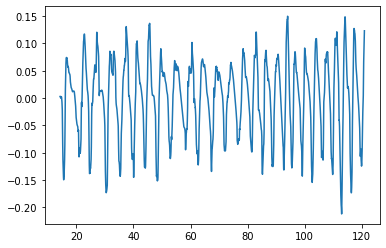

In [278]:
plt.plot(speeds['Time'], speeds['Phalanx_0'])

In [18]:
threshold = 0.03 #m/s
v_start = abs(speeds['Phalanx_0'] >= threshold)
index_start = None
index_start = pd.DataFrame()
index_stop = None
index_stop = pd.DataFrame()
j = 0
k = 0

for i in range(0, len(speeds) - 1):
    if((v_start[i+1] == True) & (v_start[i] == False)):
        #index_start = index_start, i+1
        index_start[j] = i+1
    if((v_start[i+1] == False) & (v_start[i] == True)):
        index_stop[k] = i+1
    
for i in range(0, len(speeds) - 1):
    if((v_start[i+1] == True) & (v_start[i] == False)):
        #index_start = index_start, i+1
        j = j+1
    index_start.loc[j] = i+1
    if((v_start[i+1] == False) & (v_start[i] == True)):
        k = k+1
    index_stop.loc[k] = i+1 
    
index_start = index_start.transpose()
index_stop = index_stop.transpose()

In [19]:
index_start

0    1    2    3    4    5     6     7     8     9   ...    18    19    20  \
0  65  250  387  575  748  904  1046  1193  1366  1543  ...  2796  2903  3042   

     21    22    23    24    25    26    27  
0  3181  3317  3440  3570  3694  3824  3837  

[1 rows x 28 columns]

In [20]:
index_stop

0    1    2    3    4    5     6     7     8     9   ...    17    18  \
0  115  305  454  658  814  949  1095  1264  1439  1544  ...  2718  2843   

     19    20    21    22    23    24    25    26  
0  2955  3102  3238  3374  3501  3619  3745  3837  

[1 rows x 27 columns]

In [21]:
window = 10 # 3 matches 100 ms..

In [22]:
input_data = None
input_data = speeds['Phalanx_0'][index_start[0][0]:index_start[0][0]+window]
input_data

65    0.029633
66    0.036635
67    0.045836
68    0.053666
69    0.059864
70    0.063068
71    0.067060
72    0.069939
73    0.072285
74    0.073304
Name: Phalanx_0, dtype: float64

In [111]:
init_vals = [0.1,0.1,0.1]
best_vals, covar = curve_fit( jerk_model, np.arange( window ), input_data)#, p0 = init_vals )
print( "best parameters: ", best_vals )

best parameters:  [ 1.71543437e-06  2.29167986e+01 -5.76769909e+00]


In [207]:
#simulated_speed = jerk_model(speeds['Time'], best_vals[0], best_vals[1], best_vals[2])
#simulated_speed = jerk_model(speeds['Time'], *best_vals)

simulated_speed = jerk_model(np.arange(20), *best_vals)

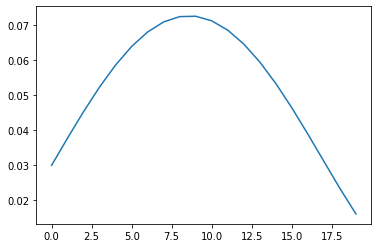

In [208]:
#plt.plot(simulated_speed[index_start[0][0] + np.arange(window)])
plt.plot(simulated_speed, label = 'Fit')

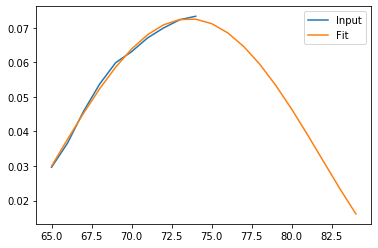

In [282]:
#plt.plot(speeds['Time'][index_start[0][0]:index_start[0][0]+window], input_data, label = 'Input')
#plt.plot(speeds['Time'][index_start[0][0]:index_start[0][0]+window], simulated_speed[index_start[0][0]:index_start[0][0]+window], label = 'Fit')

plt.plot(index_start[0][0] + np.arange(window), input_data, label = 'Input')
#plt.plot(index_start[0][0] + np.arange(window), simulated_speed[index_start[0][0]:index_start[0][0]+window], label = 'Fit')
plt.plot(index_start[0][0] + np.arange(20), simulated_speed, label = 'Fit')


plt.legend()

In [283]:
v_stop = (abs(simulated_speed) < threshold)

In [285]:
index_predicted_stop = None
index_predicted_stop = pd.DataFrame()
k = 0

for i in range(0, 20 - 1):
    if((v_stop[i+1] == True) & (v_stop[i] == False)):
        index_predicted_stop[k] = i+1
    
for i in range(0, 20 - 1):
    if((v_stop[i+1] == True) & (v_stop[i] == False)):
        k = k+1
    index_predicted_stop.loc[k] = i+1
    
index_predicted_stop

0
0  17
1  19

In [216]:
speeds['Time'][index_predicted_stop[0][0]], speeds['Time'][index_stop[0][0]]

(14.77042, 17.8747)

In [286]:
index_predicted_stop[0][0], index_stop[0][0], index_start[0][0]

(17, 115, 65)

In [292]:
print("Predicted Movement Duration: " + str(speeds['Time'][index_start[0][0] + index_predicted_stop[0][0]] - speeds['Time'][index_start[0][0]]) )
print("Real Movement Duration: " + str( speeds['Time'][index_stop[0][0]] - speeds['Time'][index_start[0][0]]) )


Predicted Movement Duration: 0.49990000000000023
Real Movement Duration: 1.6801500000000011


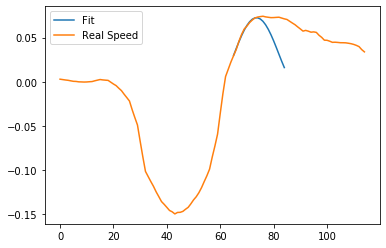

In [228]:
# MJ Velocity
#plt.plot(speeds['Time'][0:index_stop[0][0] + window], simulated_speed[0:index_stop[0][0] + window], label = "MJ Velocity")
plt.plot(index_start[0][0] + np.arange(20), simulated_speed, label = 'Fit')

# REAL
#plt.plot(speeds['Time'][0:index_stop[0][0] + window], speeds['Phalanx_0'][0:index_stop[0][0] + window], label = "Real Speed")
plt.plot(speeds['Phalanx_0'][0:index_stop[0][0]], label = "Real Speed")

plt.legend()

In [230]:
# MJ Velocity
#plt.plot(speeds['Time'][0:350], simulated_speed[0:350], label = "MJ Velocity")

# REAL
#plt.plot(speeds['Time'][0:350], speeds['Phalanx_0'][0:350], label = "Real Speed")
#plt.legend()

In [279]:
#plt.plot(speeds['Time'][index_start[0][0] - window:index_predicted_stop[0][0] + window], simulated_speed[index_start[0][0] - window:index_predicted_stop[0][0] + window])


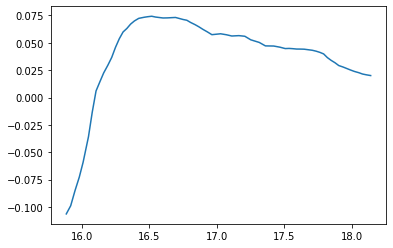

In [232]:
plt.plot(speeds['Time'][index_start[0][0] - window:index_stop[0][0] + window], speeds['Phalanx_0'][index_start[0][0] - window:index_stop[0][0] + window])

In [35]:
#def jerk_model_real( t, t0, tf, xf, x0):
    
   #return (xf - x0)/(tf - t0) * (30*((t - t0)/(tf - t0))**2 - 60*((t - t0)/(tf - t0))**3 + 30*((t - t0)/(tf - t0))**4)

In [253]:
x0 = speeds['Phalanx_0'][index_start[1][0]]
t0 = speeds['Time'][index_start[1][0]]
def jerk_model_real_init( t, tf, xf):
    
    return (xf - x0)/(tf - t0) * (30*((t - t0)/(tf - t0))**2 - 60*((t - t0)/(tf - t0))**3 + 30*((t - t0)/(tf - t0))**4)

In [254]:
def jerk_model_real( t, tf, xf):
    
    return (xf)/(tf) * (30*((t)/(tf))**2 - 60*((t)/(tf))**3 + 30*((t)/(tf))**4)

In [255]:
#speeds['Time'][index_start[1][0]:index_start[1][0]+50]

best parameters:  [53.86793934  3.6945629 ]


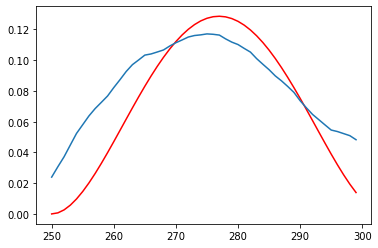

In [308]:
input_data_2 = None
window_2 = 50
input_data_2 = speeds['Phalanx_0'][index_start[1][0]:index_start[1][0]+window_2]
#xdata_2 = np.linspace(index_start[1][0], 1, index_start[1][0]+50)
#best_vals_2, covar = curve_fit( jerk_model_real, speeds['Time'][index_start[1][0]:index_start[1][0]+50], input_data_2)#np.arange(50), input_data_2)

best_vals_2, covar = curve_fit( jerk_model_real, np.arange(window_2), input_data_2)
print( "best parameters: ", best_vals_2 )

plt.plot(index_start[1][0] + np.arange(window_2), jerk_model_real(np.arange(window_2), *best_vals_2), 'r-', label = 'Fit')

plt.plot(input_data_2, label = 'Input')
plt.legend()
simulated_speed_2 =  jerk_model_real(np.arange(window_2), *best_vals_2)

In [294]:
print(50 + np.arange(50) + 50)
index_start[1][0]

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]


250

In [295]:
v_stop_2 = simulated_speed_2 < threshold

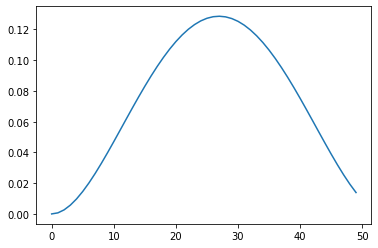

In [296]:
plt.plot(simulated_speed_2)

In [300]:
index_predicted_stop_2 = None
index_predicted_stop_2 = pd.DataFrame()
k = 0

for i in range(0, window_2 - 1):
    if((v_stop_2[i+1] == True) & (v_stop_2[i] == False)):
        index_predicted_stop_2[k] = i+1
    
for i in range(0, window_2 - 1):
    if((v_stop_2[i+1] == True) & (v_stop_2[i] == False)):
        k = k+1
    index_predicted_stop_2.loc[k] = i+1
    
index_predicted_stop

0
0  46
1  49

In [298]:
speeds['Time'][index_stop[1][0]]

23.63823

In [264]:
speeds['Time'][250 + index_predicted_stop_2[0][1]]# - speeds['Time'][250 + index_predicted_stop[0][0]]

23.47021

In [247]:
index_predicted_stop_2[0][0], index_stop[1][0]

(21, 305)

In [272]:
print("Predicted Movement Duration: " + str(speeds['Time'][250 + index_predicted_stop_2[0][0]] - speeds['Time'][index_start[1][0]]))
print("Real Movement Duration: " + str( speeds['Time'][index_stop[1][0]] - speeds['Time'][index_start[1][0]]) )
print("Difference Predicted/Real : "+ str(abs((speeds['Time'][250 + index_predicted_stop_2[0][0]] - speeds['Time'][index_start[1][0]])
                                              - (speeds['Time'][index_stop[1][0]] - speeds['Time'][index_start[1][0]]))) + " s")

Predicted Movement Duration: 1.3041300000000007
Real Movement Duration: 1.5558900000000015


In [271]:
speeds['Time'][250 + index_predicted_stop_2[0][1]]

23.47021

In [347]:
def pos_jerk(t, xf):
    return xi + (xf - xi)*(10*((t)/(tf))**3 - 15*((t)/(tf))**4 + 6*((t)/(tf))**5)

best parameters:  [0.62338517]


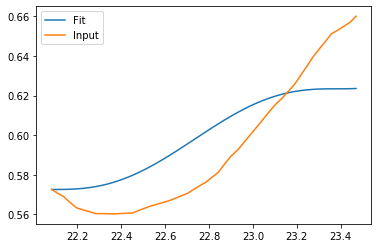

In [360]:
xi = positions['Phalanx_0'][index_start[1][0]]
tf = (positions['Time'][250 + index_predicted_stop_2[0][0]] - positions['Time'][index_start[1][0]])
t = positions['Time'][index_start[1][0]:index_start[1][0]+window_2] - positions['Time'][index_start[1][0]]

best_vals_pos, covar = curve_fit(pos_jerk, t, positions['Phalanx_0'][index_start[1][0]:index_start[1][0]+window_2])
print( "best parameters: ", best_vals_pos )

predicted_pos = pos_jerk(t, best_vals_pos[0])

plt.plot(positions['Time'][index_start[1][0]:index_start[1][0]+window_2], xi + (best_vals_pos[0] - xi)*(10*(t/tf)**3 - 15*(t/tf)**4 + 6*(t/tf)**5), label = 'Fit')
#plt.plot(positions['Time'][index_start[1][0]:index_start[1][0]+window_2], predicted_pos, label = 'PredictedPos')
plt.plot(positions['Time'][index_start[1][0]:index_start[1][0]+window_2], positions['Phalanx_0'][index_start[1][0]:index_start[1][0]+window_2], label = 'Input')
plt.legend()

In [379]:
predicted_pos[index_start[1][0]] - positions['Phalanx_0'][index_start[1][0]]
print("Difference Position : " + str(abs((predicted_pos[index_start[1][0] + index_predicted_stop_2[0][0]] - positions['Phalanx_0'][index_stop[1][0]]) * 100)) + " cm")


Difference Position : 5.270923104392445 cm


In [340]:
xi, best_vals_2[1]-xi, index_predicted_stop_2[0][0], (positions['Time'][250 + index_predicted_stop_2[0][0]] - positions['Time'][index_start[1][0]])

(0.5725957, 3.121967204886186, 46, 1.3041300000000007)

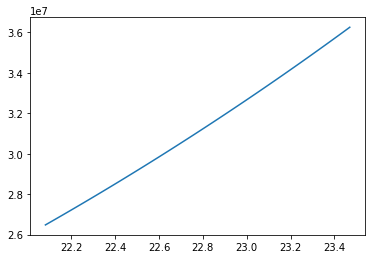

In [333]:
plt.plot(positions['Time'][index_start[1][0]:index_start[1][0]+window_2], xi + (best_vals_2[1])*(10*(t/(positions['Time'][250 + index_predicted_stop_2[0][0]] - positions['Time'][index_start[1][0]]))**3 - 15*((t)/(positions['Time'][250 + index_predicted_stop_2[0][0]] - positions['Time'][index_start[1][0]]))**4 + 6*((t)/(positions['Time'][250 + index_predicted_stop_2[0][0]] - positions['Time'][index_start[1][0]]))**5), label = 'Fit')
